In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import rc
rc("font", family = "serif",size=20)
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'

import cvxpy as cp
import numpy as np

from loss import *
from reg import *
from util import *
from glrm2 import *


In [43]:
m =100
n1=1
n2=n1+5
# n3=n2+0
n = n2
ktrue=2
k=2


Xtrue = np.random.randn(m,ktrue)
Ytrue = np.random.randn(ktrue,n)
A = Xtrue @ Ytrue
A[:,n1:n2] = 3*A[:,n1:n2]+1
missing_mask,missing_idx = gen_random_missing_mask(A,3,return_indices=True)
U = np.random.randn(*A.shape)

In [44]:
missing_idx

array([[17,  3],
       [43,  2],
       [ 9,  4]])

In [45]:
arr =np.round(A[:,1:])
arr - arr.min(axis=0)

A[:,1:] = np.clip(arr - arr.min(axis=0),a_min=0,a_max=5)

In [46]:
A

array([[ 3.1381147 ,  5.        ,  5.        ,  5.        ,  5.        ,
         2.        ],
       [-0.92124333,  5.        ,  5.        ,  5.        ,  5.        ,
         5.        ],
       [-2.07853565,  5.        ,  4.        ,  5.        ,  5.        ,
         5.        ],
       [ 3.76468308,  5.        ,  5.        ,  5.        ,  5.        ,
         2.        ],
       [-1.07072728,  5.        ,  5.        ,  5.        ,  4.        ,
         5.        ],
       [ 0.38724275,  5.        ,  5.        ,  5.        ,  5.        ,
         5.        ],
       [-2.45682169,  5.        ,  3.        ,  4.        ,  5.        ,
         5.        ],
       [ 3.0435164 ,  5.        ,  5.        ,  5.        ,  4.        ,
         3.        ],
       [-2.6792628 ,  5.        ,  3.        ,  4.        ,  5.        ,
         5.        ],
       [ 3.0010654 ,  5.        ,  5.        ,  5.        ,  5.        ,
         2.        ],
       [-2.6132142 ,  5.        ,  3.        ,  3.

In [47]:
loss_list =[
    (np.arange(n1),QuadraticLoss()),
    (np.arange(n1,n2),OneVsAllLoss())
]

In [53]:
glrm = GLRM(A,loss_list,5,scale=True)
# glrm._equiv_indices()
# 
# glrm.

In [55]:
out = glrm.fit()

iter 	 objY


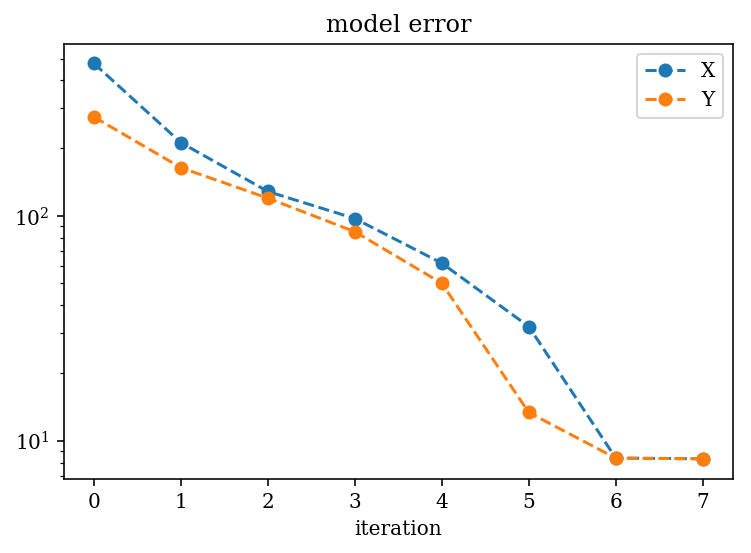

In [56]:
glrm.plot_convergence()

In [58]:
glrm.fit(10)

iter 	 objY
 27 	 8.17

In [59]:
np.argmax(np.abs(A[:,0]-glrm.predict()[:,0]))

83

In [60]:
A[:,0][41]

0.23204673508936996

In [61]:
glrm.predict()[:,0][41]

0.23204671681525701

In [62]:
missing_idx


array([[17,  3],
       [43,  2],
       [ 9,  4]])

In [66]:
Z = glrm.Xv.value @ glrm.Yv.value

In [323]:
for i in range(len(glrm._loss_list)):
    cols = glrm.equiv_indices[i]
    lf = glrm._loss_list[i][-1]
    print(lf.decode(Z[:,cols]+glrm.mu[i]))

[[ 1.72844915]
 [ 1.25945058]
 [ 0.61923132]
 [-0.23424762]
 [ 0.67291128]
 [ 0.43760963]
 [ 1.12536676]
 [-0.07199904]
 [ 0.35477988]
 [ 0.10999883]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [0]
 [3]]
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [319]:
Z[:,0]+glrm.mu[0]

array([ 1.72844915,  1.25945058,  0.61923132, -0.23424762,  0.67291128,
        0.43760963,  1.12536676, -0.07199904,  0.35477988,  0.10999883])

In [320]:
Z[:,1:5]+glrm.mu[1]

array([[-3.5921457 , -1.96067515, -1.96067515,  3.5921457 ],
       [-2.32795624, -3.64993172, -3.64993172,  2.32795624],
       [-2.41300706, -2.76819575, -2.76819575,  2.41300706],
       [-2.8975202 , -2.27570315, -2.27570315,  2.8975202 ],
       [-2.39621563, -2.82736806, -2.82736806,  2.39621563],
       [-2.48401066, -2.59199565, -2.59199565,  2.48401066],
       [-2.32730182, -3.43818027, -3.43818027,  2.32730182],
       [-2.78368389, -2.30469379, -2.30469379,  2.78368389],
       [ 2.40946256, -2.34668864, -2.34668864, -2.40946256],
       [-2.66294882, -2.37227209, -2.37227209,  2.66294882]])

In [303]:
print(repr(glrm.objY))
print(glrm.objY.value)

Expression(CONVEX, NONNEGATIVE, ())
3.4552631657023084e-13


In [305]:
pX.solve()

[11.015971697224275,
 0.05570176404801811,
 6.804600069684885e-14,
 1.5413733662238583e-14,
 9.022512143964937e-14,
 8.234343538372046e-15,
 6.450772367172125e-14,
 3.71818132191443e-14,
 5.649387180481796e-14,
 3.72059156428762e-16,
 7.906798135271001e-16,
 3.878770695661036e-13,
 3.2547664903607253e-15,
 4.70263147100714e-17,
 6.342982856517118e-13,
 2.316763185433696e-15,
 2.5713991728628737e-15,
 5.556385522709017e-15,
 5.2357685612814546e-15,
 6.777325410494869e-15,
 3.7696302006358075e-17,
 3.490318724155152e-17,
 4.439258217370268e-17,
 4.3788556480236315e-17,
 3.7196525037159246e-17,
 8.712070007186504e-15,
 3.609917328599789e-15,
 5.322743147873027e-16,
 2.427460212764945e-15,
 2.309630898697473e-13,
 9.464367975066599e-13,
 1.186986676980998e-12,
 2.5990100300988203e-16,
 2.5927009675774865e-16,
 4.795228785953283e-16,
 2.008632900721419e-16,
 1.391827449646915e-16,
 6.998545226346632e-16,
 2.1258492035873013e-15,
 3.5588809039508496e-13,
 1.532185553570845e-13,
 3.8850722592

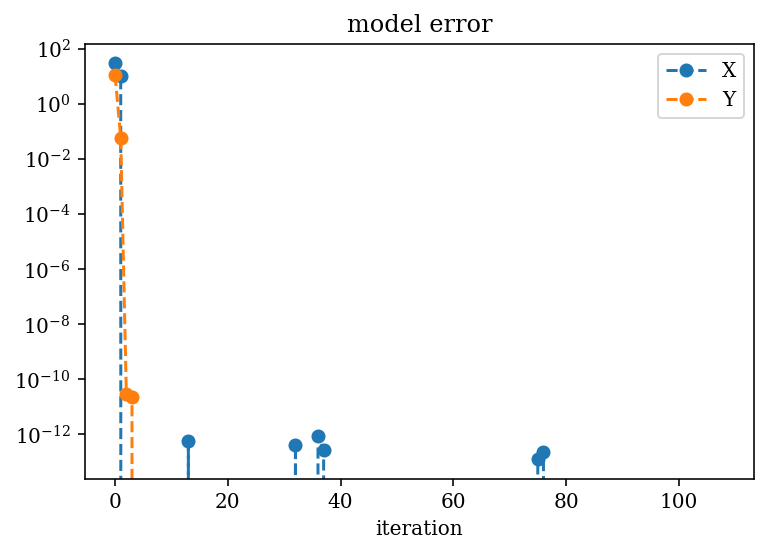

In [295]:
glrm.plot_convergence()

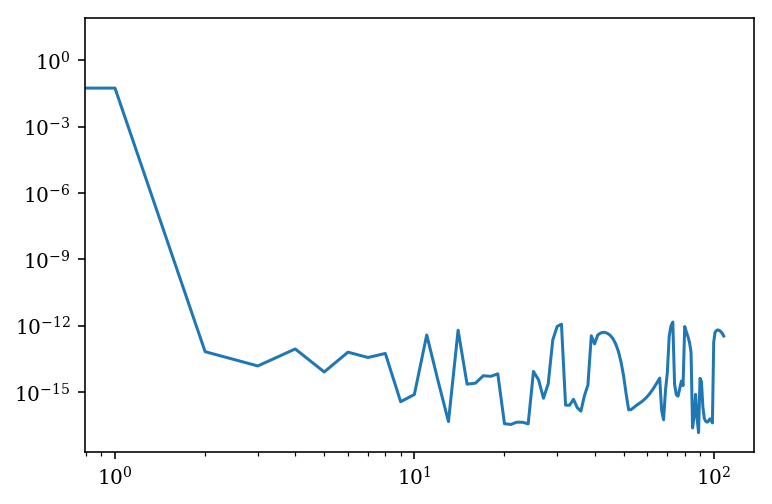

In [307]:
plt.loglog(glrm.vals)

In [17]:
A

array([[ 1.72844916,  3.        ,  0.        ],
       [ 1.25945058,  3.        ,  1.        ],
       [ 0.61923132,  3.        ,  1.        ],
       [-0.23424762,  3.        ,  1.        ],
       [ 0.67291128,  3.        ,  1.        ],
       [ 0.43760963,  3.        ,  1.        ],
       [ 1.12536676,  3.        ,  1.        ],
       [-0.07199903,  3.        ,  1.        ],
       [ 0.35477988,  0.        ,  1.        ],
       [ 0.10999883,  3.        ,  1.        ]])

In [20]:
true = np.random.randint(0,5,5)
pred = np.random.randint(0,5,5)

In [8]:
A[:,0].std()**2

5.432578272783934

In [9]:
for i in range(len(_loss_list)):
    data, mask, loss_fxn = _loss_list[i]
    if isinstance(loss_fxn,OneVsAllLoss):
        vals, counts = np.unique(A[:,1],return_counts=True)
        mu[i] = vals[np.argmax(counts)]
        
        sigma[i]
    else:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-9-329303d3e92f>, line 9)

In [10]:
_loss_list[1][-1].encode(A[1:2,1:2],missing_mask)

(array([[-1., -1., -1.,  1.]]), array([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True, False,  True],
        [False,  True,  True],
        [False,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]))

In [33]:
A[:,1:2]

array([[0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [46]:
_loss_list[1][-1].calc_scaling(A[:,1:2],missing_mask)


4.0

In [42]:
mu = oneHotTransform(np.array([[3]]),max_index =[A[:,1].max()])
oneHot = oneHotTransform(A[:,1:2])
oneHot

array([[ 1., -1., -1., -1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.]])

In [ ]:
OneVsAllLoss()(oneHot)

In [83]:
a = _loss_list[1][-1]
a.calc_scaling()

In [34]:
equiv_columns = []
for i,v in enumerate(_loss_list):
    equiv_columns.append(v[0].shape[1])
np.cumsum(equiv_columns)

array([ 1,  8, 15])

In [37]:
for data, mask, loss_fxn in _loss_list:
    print(loss_fxn.decode(data))

[[ 0.3480116 ]
 [ 1.36952025]
 [ 2.32236907]
 [ 2.62412021]
 [-0.4751927 ]
 [-2.70210125]
 [-1.75686157]
 [-4.25326804]
 [ 0.98961316]
 [-1.35063465]]
[[5]
 [0]
 [3]
 [5]
 [5]
 [6]
 [5]
 [6]
 [6]
 [0]]
[[6]
 [0]
 [4]
 [6]
 [4]
 [4]
 [4]
 [4]
 [6]
 [6]]


In [40]:
np.hstack([v[-1].decode(v[0]) for v in _loss_list])

array([[ 0.3480116 ,  5.        ,  6.        ],
       [ 1.36952025,  0.        ,  0.        ],
       [ 2.32236907,  3.        ,  4.        ],
       [ 2.62412021,  5.        ,  6.        ],
       [-0.4751927 ,  5.        ,  4.        ],
       [-2.70210125,  6.        ,  4.        ],
       [-1.75686157,  5.        ,  4.        ],
       [-4.25326804,  6.        ,  4.        ],
       [ 0.98961316,  6.        ,  6.        ],
       [-1.35063465,  0.        ,  6.        ]])

In [ ]:
_loss_list[0]

In [38]:
def decode(A):
    print(A)
    return np.argmax(A,axis=1)
decode(_loss_list[1][0])

[[-1. -1. -1. -1. -1.  1. -1.]
 [ 1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1. -1.  1.]
 [ 1. -1. -1. -1. -1. -1. -1.]]


array([5, 0, 3, 5, 5, 6, 5, 6, 6, 0])

In [39]:
A[:,1]

array([3., 3., 2., 0., 2., 3., 3., 2., 3., 2.])

In [ ]:
one_hot_A

loss_list = []

In [93]:
truth = np.array([[1,-1,-1],
                  [-1,1,-1]])

U = cp.Variable(truth.shape)
U.value = np.random.randn(*truth.shape)
print(U.value)
guess = np.array([1, -1, 1])
ova = OneVsAllLoss()
# ova(truth,guess).value

[[ 0.25668006 -2.01128764  0.74011925]
 [-0.11569469  2.29725728  1.27186054]]


In [92]:
for c in [0,1,2]:
    print(truth[:,c])
    print(U[:,c].value)
    obj = cp.Minimize(ova(truth[:,c],U[:,c]))
    prob = cp.Problem(obj)
    prob.solve()
    print(U.value)
    

[ 1 -1]
[0. 0.]
[ True False]
[[ 1.60023997  0.          0.        ]
 [-1.60023997  0.          0.        ]]
[-1  1]
[0. 0.]
[False  True]
[[ 0.         -1.60023997  0.        ]
 [ 0.          1.60023997  0.        ]]
[-1 -1]
[0. 0.]
[False False]


ValueError: Invalid dimensions (0,).

In [20]:
arr = -np.ones((3,3))
arr[np.diag_indices_from(arr)]=1
arr

array([[ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.]])

In [ ]:
bbb

In [73]:
glrm.mu

[array(0.60015508), array([[-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.],
        [-1., -1., -1.,  1.]]), array([[-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.]])]

In [72]:
glrm.sigma

[0.346412493665681, 0.4, 0.4]

In [280]:
m =A.shape[0]
n = glrm.equiv_indices[-1][-1]+1
k=4
Xv = cp.Variable((m,k))
Xp = cp.Parameter((m,k))


Yv = cp.Variable((k,n))
Yp = cp.Parameter((k,n))

Xv.value = np.random.rand(m,k)
Yp.value = np.random.rand(k,n)

Xp.value = np.random.rand(m,k)
Yv.value = np.random.rand(k,n)
# objX = 

In [281]:
Zx = Xv @ Yp
Zy = Xp @ Yv
objX = 0
objY=0
for i,(data, mask, loss_fxn) in enumerate(glrm._loss_list):
    cols = glrm.equiv_indices[i]
    print(cols)
    objX+= loss_fxn(data[mask],(Zx[:,cols]+glrm.mu[i])[mask])/glrm.sigma[i]
    objY+= loss_fxn(data[mask],(Zy[:,cols]+glrm.mu[i])[mask])/glrm.sigma[i]
#     if i==1:
#         break

#     objX = loss_fxn(data[mas])
objX += QuadraticReg(nu=.0001)(Xv)
objY += QuadraticReg(nu=.0001)(Yv)
pX = cp.Problem(cp.Minimize(objX))
pY = cp.Problem(cp.Minimize(objY))

[0]
[1 2 3 4]
[5 6]


In [282]:
for i in range(100):
    pX.solve(cp.ECOS)
    pY.solve(cp.ECOS)

In [283]:
pX.solve()

0.012526298793072344

In [284]:
Z=(Xv.value @ Yp.value)
Z.shape

(10, 7)

In [285]:
Z[:,0]+glrm.mu[0]

array([ 1.7279309 ,  1.2592922 ,  0.61922264, -0.23355208,  0.67289909,
        0.43777232,  1.12524124, -0.07138118,  0.35412157,  0.11044602])

In [286]:
np.argmax(Z[:,1:5]+glrm.mu[1],axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 3])

In [287]:
np.argmax(Z[:,5:]+glrm.mu[2],axis=1)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [288]:
A

array([[ 1.72844916,  3.        ,  0.        ],
       [ 1.25945058,  3.        ,  1.        ],
       [ 0.61923132,  3.        ,  1.        ],
       [-0.23424762,  3.        ,  1.        ],
       [ 0.67291128,  3.        ,  1.        ],
       [ 0.43760963,  3.        ,  1.        ],
       [ 1.12536676,  3.        ,  1.        ],
       [-0.07199903,  3.        ,  1.        ],
       [ 0.35477988,  0.        ,  1.        ],
       [ 0.10999883,  3.        ,  1.        ]])

In [289]:
np.linalg.matrix_rank(np.hstack([a[0] for a in glrm._loss_list]))

4

## One hot encoding increased the rank of the matrix?